Elaborado por [Juan Galvis](https://scholar.google.com/citations?user=lbfc2joAAAAJ&hl=en).

# Punto flotante
Presentamos ilustraciones simples de cálculo con números de máquina y redondeo.

In [1]:
x16=Float16(1.0)
println("x16=\t",bitstring(x16))
x32=Float32(1.0)
println("x32=\t",bitstring(x32))
x64=Float64(1.0)
println("x64=\t",bitstring(x64))

x16=	0011110000000000
x32=	00111111100000000000000000000000
x64=	0011111111110000000000000000000000000000000000000000000000000000


In [2]:
println(bitstring(-0.0))
println(bitstring(0.0))

1000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000


In [3]:
x16=Float16(0.1)
println("x16=\t",bitstring(x16))
x32=Float32(0.1)
println("x32=\t",bitstring(x32))
x64=Float64(0.1)
println("x64=\t",bitstring(x64))

x16=	0010111001100110
x32=	00111101110011001100110011001101
x64=	0011111110111001100110011001100110011001100110011001100110011010


In [4]:
x16=Float16(π)
println("x16=\t", x16)
x32=Float32(π)
println("x32=\t",x32)
x64=Float64(π)
println("x64=\t",x64)
xBig=BigFloat(π)
println("xBig=\t", xBig)

x16=	3.14
x32=	3.1415927
x64=	3.141592653589793
xBig=	3.141592653589793238462643383279502884197169399375105820974944592307816406286198


Puede consultar cuántos bits usa cada uno de estos tipos de datos. 

In [5]:
varinfo()

| name |     size | summary  |
|:---- | --------:|:-------- |
| Base |          | Module   |
| Core |          | Module   |
| Main |          | Module   |
| x16  |  2 bytes | Float16  |
| x32  |  4 bytes | Float32  |
| x64  |  8 bytes | Float64  |
| xBig | 80 bytes | BigFloat |


Tambien podemos consultar por el $\epsilon$ de la maquina y el rango representado

In [6]:
using Printf

In [7]:
@printf("eps para Float16\t %.g\n",eps(Float16))
@printf("eps para Float32\t %.5g\n",eps(Float32))
@printf("eps para Float64\t %.5g\n",eps(Float64))
@printf("eps para BogFloat\t %.5g\n",eps(BigFloat))
#println(eps(Float16))
#println(eps(Float32))
#println(eps())
#println(eps(BigFloat))

eps para Float16	 0.001
eps para Float32	 1.1921e-07
eps para Float64	 2.2204e-16
eps para BogFloat	 1.7272e-77


In [8]:
@printf("Min, Max Float16\t %.5g  \t\t %.5g\n",floatmin(Float16),floatmax(Float16))
@printf("Min, Max Float32\t %.5g\t\t %.5g\n",floatmin(Float32), floatmax(Float32))
@printf("Min, Max Float64\t %.5g\t\t %.5g\n",floatmin(Float64), floatmax(Float64))
@printf("Min, Max BogFloat\t %.5g\t %.5g\n",floatmin(BigFloat), floatmax(BigFloat))
#println(eps(Float16))
#println(eps(Float32))
#println(eps())
#println(eps(BigFloat))

Min, Max Float16	 6.1035e-05  		 65504
Min, Max Float32	 1.1755e-38		 3.4028e+38
Min, Max Float64	 2.2251e-308		 1.7977e+308
Min, Max BogFloat	 8.5097e-1388255822130839284	 5.8757e+1388255822130839282


In [9]:
xeps=bitstring(eps(Float32));
println("signo=",xeps[1],"\t exp=",xeps[2:9],"\t significand=",xeps[19:32])
xmin=bitstring(floatmin(Float32))
println("signo=",xmin[1],"\t exp=",xmin[2:9],"\t significand=",xmin[19:32])
xmax=bitstring(floatmax(Float32))
println("signo=",xmax[1],"\t exp=",xmax[2:9],"\t significand=",xmax[19:32])

signo=0	 exp=01101000	 significand=00000000000000
signo=0	 exp=00000001	 significand=00000000000000
signo=0	 exp=11111110	 significand=11111111111111


Debemos tener cuidado al comparar dos variables de tipo float en condiciones para control condicional o control iterativo. Considere los siguientes ejemplos.

In [10]:
(0.1+0.1)==0.2

true

In [11]:
(0.1+0.1+0.1)==0.3

false

Podemos comparar usando una tolerancia u usar el operador de comparación aproximada.

In [12]:
tol=1E-10
((0.1+0.1+0.1)-0.3)< tol

true

In [13]:
(0.1+0.1+0.1)≈0.3 #  comparación aproximada.

true

Veamos que pasa si intentamos sumar x=1/10 varias veces, esto es, $\sum_{i=1}^N 0.1$. Veamos la siguiente implementación.

In [14]:
suma64=0.0
n=10^6
for i=1:n
  suma64=suma64+(1/10) 
end
println("Despues de ",n, " sumas(Float64) de 1/10, el resultado es ",suma64)
x=1/10
p=n*x
println("El producto es : ",p)

Despues de 1000000 sumas(Float64) de 1/10, el resultado es 100000.00000133288
El producto es : 100000.0


In [15]:
suma32=Float32(0.0)
n=10^6
for i=1:n
  suma32=suma32+Float32(1/10) 
end
println("Despues de ",n, " sumas(Float32) de 1/10, el resultado es ",suma32)
x=Float32(1/10)
p=n*x
println("El producto es : ",p)

Despues de 1000000 sumas(Float32) de 1/10, el resultado es 100958.34
El producto es : 100000.0


Veamos  numéros de máquina positivos pequeños y algunas operaciones.

In [16]:
x=3E-324
y=2E-324
print("x=",x,"es un numero de maquina. Pero y=2E-324 es aproximado  a  y=\t",y, "\n")
print("Al dividir x=3E-324 por dos tenemos x/2=\t",x/2,"\n")
print("Note tambien que 1/x=\t",1/x)

x=5.0e-324es un numero de maquina. Pero y=2E-324 es aproximado  a  y=	0.0
Al dividir x=3E-324 por dos tenemos x/2=	0.0
Note tambien que 1/x=	Inf

Ahora numéros positivos grandes.

In [17]:
x=1.7E+308
#y=1.8E+308 # overflow in numeric constant 
print("x=",x," es un numéro de maquina pero  y genera desbordamiento\n")

x=1.7e308 es un numéro de maquina pero  y genera desbordamiento


Verificamos ahora la no-asociatividad de la suma en el siguiente ejemplo.

In [18]:
x=1E+26-1E+26+1
y=1E+26+1-1E+26
print("x= ",x, " diferente de   y=",y)

x= 1.0 diferente de   y=0.0

Considere tambien el siguiente ejemplo.

In [19]:
a=1E+308
b=1.1E+308
c=-1.001E+308
x=a+(b+c)
y=(a+b)+c
#y=a**2
print("x=",x," que es diferente a  y=",y)

x=1.099e308 que es diferente a  y=Inf

Otro ejemplo es el de calcular $\sqrt{a^2+b^2}$ con $a=$1E+200 y $b=1$.

In [20]:
a=1E+200
b=1
y=sqrt( a^2+b^2)
println(y)


Inf


Podemos evitar el desbordamiento por exceso.

In [21]:
z=a*sqrt( 1+(b/a)^2)
println(z)

1.0e200


Algunas expresiones ideterminadas con las que se debe tener cuidado a la hora de calcular con punto flotante.

In [22]:
x=1
y=0
z=1E+307*100
w=1E+308*100
println("x= ",x,", y=",y,", z=",z,", w=",w, "\n")
println("Inf/Inf=",w/z,"\n")
println("Inf*Inf=",w*z,"\n")
println("1/NaN=", 1/(w/z),"\n")
println("NaN*1=",(w/z)*1,"\n")
println("sqrt(NaN)=",sqrt((w/z)),"\n")

x= 1, y=0, z=Inf, w=Inf

Inf/Inf=NaN

Inf*Inf=Inf

1/NaN=NaN

NaN*1=NaN

sqrt(NaN)=NaN



El siguiente código muestra un código simple para aproximar el epsilon de la máquina para precisión simple en esta maquina.

In [23]:
diferencia=0
t=1
i=0
while(diferencia!=1)
  i=i+1
  t=Float32(t/2)
  uno=Float32(1.0)
  diferencia=uno-t
#  println("La resta de 1-t (",i,") es ",diferencia,"\n")
end
println("Epsilon de máquina es aproximadamente ",2*t)
println("La precisión en bits es ",-log2(2*t),"bits.")
println("La precisión en decimales es ",-log10(2*t),".")
println("Usando la funcion eps de Julia eps=", eps(Float32))

Epsilon de máquina es aproximadamente 5.9604645e-8
La precisión en bits es 24.0bits.
La precisión en decimales es 7.22472.
Usando la funcion eps de Julia eps=1.1920929e-7


In [24]:
diferencia=0
t=1
i=0
while(diferencia!=1)
  i=i+1
  t=t/2
  uno=1.0
  diferencia=uno-t
#  println("La resta de 1-t (",i,") es ",diferencia,"\n")
end
println("Epsilon de máquina es aproximadamente ",2*t)
println("La precisión en bits es ",-log2(2*t),"bits.")
println("La precisión en decimales es ",-log10(2*t),".")
println("Usando la funcion eps de Julia eps=", eps(Float32))

Epsilon de máquina es aproximadamente 1.1102230246251565e-16
La precisión en bits es 53.0bits.
La precisión en decimales es 15.954589770191003.
Usando la funcion eps de Julia eps=1.1920929e-7


Un ejemplo de perdida de dígitos (o cancelación) es el siguiente.

In [25]:
x=1E-15
y=((1+x)-1)/x
print("y=",y)
print("Con error relativo de ", 100*(y-1),"%.")

y=1.1102230246251565Con error relativo de 11.022302462515654%.

Un otro ejemplo comun de cancelación es cuando se evaluan polinomios usando la expresión de potencias. Por ejemplo, evaluemos 
$$P(x)=(x-1)^7=x^7-7x^6+21x^5-35x^4+35x^3-21x^2+7x-1$$
usando ests dos expresiones. 

In [26]:
using Plots

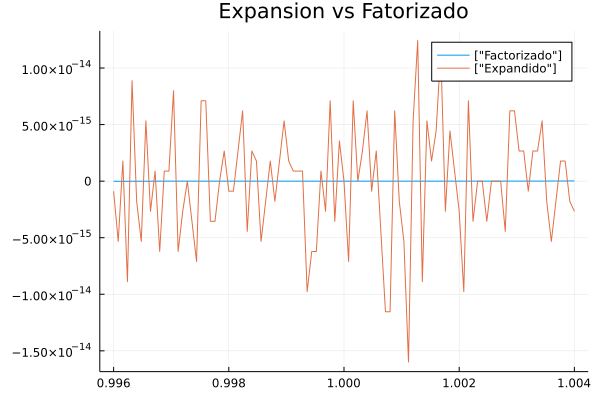

In [27]:
# puntos igualmente espaciados
a=1-4E-3
b=1+4E-3
x = a:4E-3/50:b;
p1= (x.-1).^7;
p2=x.^7-7*x.^6+21*x.^5-35*x.^4+35*x.^3-21*x.^2+7*x.-1;
plot(x, p1,title = "Expansion vs Fatorizado", label = ["Factorizado"], lw = 1)
plot!( x, p2, label=["Expandido"],lw=1)

#legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')


Por último notamos que, aunque el error de redondeo es pequeño al principio, en cálculos complejos puede acumular para ocasionar efectos **catastróficos**.


**EJEMPLO 1:**  Explosión del misil Ariane en Junio de 1996 por un **desbordamiento por exceso** en el computador del mismo.
https://www.bugsnag.com/blog/bug-day-ariane-5-disaster

**EJEMPLO 2:** La falla de una misión de un misil *American Patriot* durante la guerra del Golfo en 1991 debido a **errores de redondeo** en el cálculo de la trayectoria a seguir. 
https://www.iro.umontreal.ca/~mignotte/IFT2425/Disasters.html

A continuación calculamos la recursión $x_0=1, x_1=1/3, x_{n+1}=\frac{13}{3}x_n-\frac{4}{3}x_{n-1}$ de dos formas diferentes. Una usando directamente la definición de la recursión. La otra a partir de la formula análitica de la misma, que es $x_n=\frac{1}{3^n}$.

In [28]:
using Printf
x0=1
x1=1/3
for n=3:34
  x2=(13/3)*x1-(4/3)*x0
  exac=(1/3)^(n-1)
  @printf("Calculado(%.d) = %.g, \t\t Exacto %.g \n",n, x2,exac)
#  print("Calculado = ",x2, "\t \t Exacto = ",exac,"\n")
  x0=x1
  x1=x2
end

Calculado(3) = 0.1, 		 Exacto 0.1 
Calculado(4) = 0.04, 		 Exacto 0.04 
Calculado(5) = 0.01, 		 Exacto 0.01 
Calculado(6) = 0.004, 		 Exacto 0.004 
Calculado(7) = 0.001, 		 Exacto 0.001 
Calculado(8) = 0.0005, 		 Exacto 0.0005 
Calculado(9) = 0.0002, 		 Exacto 0.0002 
Calculado(10) = 5e-05, 		 Exacto 5e-05 
Calculado(11) = 2e-05, 		 Exacto 2e-05 
Calculado(12) = 6e-06, 		 Exacto 6e-06 
Calculado(13) = 2e-06, 		 Exacto 2e-06 
Calculado(14) = 6e-07, 		 Exacto 6e-07 
Calculado(15) = 2e-07, 		 Exacto 2e-07 
Calculado(16) = 6e-08, 		 Exacto 7e-08 
Calculado(17) = -3e-08, 		 Exacto 2e-08 
Calculado(18) = -2e-07, 		 Exacto 8e-09 
Calculado(19) = -8e-07, 		 Exacto 3e-09 
Calculado(20) = -3e-06, 		 Exacto 9e-10 
Calculado(21) = -1e-05, 		 Exacto 3e-10 
Calculado(22) = -5e-05, 		 Exacto 1e-10 
Calculado(23) = -0.0002, 		 Exacto 3e-11 
Calculado(24) = -0.0009, 		 Exacto 1e-11 
Calculado(25) = -0.003, 		 Exacto 4e-12 
Calculado(26) = -0.01, 		 Exacto 1e-12 
Calculado(27) = -0.06, 		 Exacto 4e-13 


Observe que la columna de la izquierda, tiene hasta valore negativos y parece diverge a $-\infty$. Este es otro ejemplo de algoritmo inestable. 

En Jilia podemos ver los códigos de lsa funciones internas muy fácilmente

In [ ]:
@edit sin(1.1)

>?12lr(x) = throw(DomainError(x, "sin(x) is only defined fo$function sin(x::T) where T<:Union{Float32, Float64}absx = abs(x)if absx < T(pi)/4 #|x| ~<= pi/4, no need for reductionif absx < sqrt(eps(T))return xendreturn sin_kernel(x)elseif isnan(x)return T(NaN)elseif isinf(x)sin_domain_error(x)endn, y = rem_pio2_kernel(x)

Too many errors from stdin

Un otro ejemplo comun de cancelación es cuando se evaluan polinomios usando la expresión de potencias. Por ejemplo, evaluemos 
$$P(x)=(x-1)^7=x^7-7x^6+21x^5-35x^4+35x^3-21x^2+7x-1$$
usando éstas dos expresiones al rededor de $x=1.0$. 

In [ ]:
#using Pkg
#Pkg.add("Plots")
using Plots

In [ ]:
a=1-4E-3
b=1+4E-3
x = a:(b-a)/200:b
p1= (x.-1).^7
p2=x.^7-7*x.^6+21*x.^5-35*x.^4+35*x.^3-21*x.^2+7*x.-1
plot(x, p1, label="Factored",width=5,color="red",leged=:bottomleft)
plot!(x, p2, label="Expanded", width=3,color="blue")

#  Cálculo simbólico

Para terminar mencionaremos la librería sympy que permite realizar cálculo simbólico en lugar de cálculo numérico. Recuerden que en el cálculo numérico las variables en todo momento tiene valores particulares asignados los cuales corresponden a números de máquina que dependen del formato que se esté usando: precisión simple, precisión doble, e.t.c.
En los cálculos simbólicos las variables no tienen que tomar valores particulares y se pueden manipular solo restringiendo su comportamiento a reglas que aplican a conjuntos numéricos como por ejemplo: enteros, reales, complejos, matrices, e.t.c.

In [ ]:
#using Pkg
#Pkg.add("Symbolics")

In [ ]:
using Symbolics

In [ ]:
@variables x y

In [ ]:
z=x^2+y

In [ ]:
expand(z^2)

In [ ]:
A = [x^2 + y x 2x
     0       y 2y
     y^2 + x x 0]


In [ ]:
using LinearAlgebra

In [ ]:
det(A)

In [ ]:
@variables t
D = Differential(t)

In [ ]:
z = t + t^2
D(z) # Symbolics.derivative(t + t^2, t)

In [ ]:
expand_derivatives(D(z)) # 1 + 2t

In [ ]:
D.x

In [ ]:
B = simplify.([t + t^2 + t + t^2  2t + 4t
               x + y + y + 2t     x^2 - x^2 + y^2])

In [ ]:
simplify.(substitute.(B, (Dict(x => (y-1)^2),)))

# Problemas

**PROBLEMA** ¿Cuánta memoria requiere guardar 100.000 números de punto flotante de precisión doble?¿Cuánta memoria requiere guardar una matriz de números de punto flotante dimensión 100.000 x 100.000?

**PROBLEMA** Los números de punto flotante en python son implementados usando la clase float. Es decir, además de la descripción en bits del número tenemos asociados a la una instancia de variable tipo float los los siguientes métodos y atributos para un dato float: as_integer_ratio, conjugate, fromhex, imag, is_integer, real .

Describa cada uno de estos métodos y atributos con ejemplos simples. 

La implementación del tipo de dato float en lenguaje C corresponde solo a la descripción en bits del número y no corresponde a una estructura u objeto. ¿Cuáles son las ventajas y desventajas de usar objetos?. 


**PROBLEMA(Sullivan)** Con $x_0=1/10$, considere la sucesión,  
$$
x_{n+1}=\left\{\begin{array}{ll}
2x_n & \mbox{ si } x_n\in \left[0,\frac{1}{2}\right] \\
2x_n-1 &  \mbox{ si } x_n\in \left(\frac{1}{2},1\right].
\end{array}\right.
$$
para $n=1,2,\dots$. Calcule $x_1,x_2,x_3,\dots,x_{50}$ de forma análitica y despues usandoun código en python. Compare y explique.

Repetir pero ahora iniciando con $x_0=1/8$. Compare y explique. 

**PROBLEMA** Explique la falla del Ariane y del American Patriot. Muestre cálculos numéricos para soportar su explicación. 


**PROBLEMA 5** Escriba rutina que implemente la función 
$
SF_{i}(x)=\frac{\exp\left(x_{i}\right)}{\sum_{j=1}^{n}\exp\left(x_{j}\right)}.$
La rutina debe estar estabilizada para evitar desbordamiento por exceso. 

**PROBLEMA(Stoer)** Ensaye calcular las funciones $$f(x)=\sqrt{x^2+1}-1 \quad g(x)=\frac{x^2}{\sqrt{x^2+1}+1}$$
Use valores pequeños como $x=8^{-1},8^{-2},8^{-3},\dots$. Explique los resultados. Note que, análiticamete,  $f(x)=g(x)$.


**PROBLEMA(Quarteroni,Saleri,Gervasio)** El lector puede implementar el calculo de la siguiente recurrencia que approxima $\pi$ (formula de Franc,ois Viète) y estudiar su estabilidad/instabilidad numérica, 
$$z_1=2, \,\,z_{n+1}=2^{n-1/2}\sqrt{1-\sqrt{1-4^{1-n}z_n^2}},\,\,n=2,3,\dots. $$



**PROBLEMA(Stewart)** Repita el experimento arriba con la recurrencia $x_1=\frac{1}{3}, x_2=\frac{1}{12}$,  $x_{k+1}=2.25x_k-0.5x_{k-1}$.

**PROBLEMA** Presente un ejemplo, adicional  a los presentados en clase, de algortimos inestables o problemas mal condicionados. 

**PROBLEMA** Repita el experimento arriba con $P(x)=(x-1)^7$. Agrege a la figura el siguiente método 
$$  P(x)= ((((((x-7)x+21)x-35)x+35)x-21)x+7)x-1. $$
Verifique esta formula. Implemente y comente los resultados. Esta forma de calcular polinimios es conocida como el esquema de Horner.


**PROBLEMA(Stoer)** Considere los siguientes algoritmos. Algoritmo 1
$$s=p^2,\quad t=s+q,\quad u=\sqrt{t},\quad y=-p+u  $$
y el altoritmo 2, 
$$s=p^2,\quad t=s+q,\quad u=\sqrt{t}, \quad v=p+u,\quad y=q/v $$
Escriba $y$ como función de $p$ y $q$. Compare los resutados de estos dos algoritmos cuando $p=1000$,  $q=0.0018000000081$. Explique los resultados. ¿Cuál es mas confiable para estos valores de $p$ y $q$?

**PROBLEMA** Considere el siguiente codigo
```
x=np.sqrt(1/9)
print("x={0:.60f}".format(x))
```
que dá como resultado 
x=0.333333333333333314829616256247390992939472198486328125000000.

Explique, tan detalladamente como le sea posible, lo que  está pasando. 
Compare con el siguiente código para el cual es más dificil saber la respuesta exacta. 
```
x=np.sqrt(0.1)
print("x={0:.60f}".format(x))
```
¿Cuántos decimales puede garantizar este cálculo?

**PROBLEMA** Describa los siguientes tipos de datos :numpy.half,   numpy.float16, numpy.single, numpy.double, numpy.longdouble, numpy.csingle, numpy.cdouble, numpy.clongdouble.

# Referencias



*    Fundamentals of Numerical Computation by Tobin A. Driscoll and Richard J. Braun. The book was originally written for MATLAB, but this resource has been adapted to suit Julia. https://tobydriscoll.net/fnc-julia/frontmatter.html
*   Sullivan, Eric. Numerical Methods: An Inquiry-Based Approach With Python. 2020.
*   Bulirsch, Roland, Josef Stoer, and J. Stoer. Introduction to numerical analysis. Vol. 3. Heidelberg: Springer, 2002.
*  Stewart, Gilbert W. Afternotes on numerical analysis. Society for Industrial and Applied Mathematics, 1996.
*  Quarteroni, Alfio, Fausto Saleri, and Paola Gervasio. Scientific computing with MATLAB and Octave. Vol. 3. Berlin: Springer, 2006.
* Estándar de la IEEE
* Low Precision Floating-Point Formats: The Wild West of Computer Arithmetic
https://sinews.siam.org/Details-Page/low-precision-floating-point-formats-the-wild-west-of-computer-arithmetic
* What Every Computer Scientist Should Know About Floating-Point Arithmetic, by David Goldberg, published in the March, 1991 issue of Computing Surveys. 
* Modern Computer Arithmetic: Richard P. Brent and Paul Zimmermann
https://docs.oracle.com/cd/E19957-01/806-3568/ncgTOC.html